# Table of Contents
#### Data Science Workflow
An introduction and summary of the approach I took to complete this project
#### Business Case and Business Value  
Background  
Goal  
Why is this important?  
#### Obtaining The Data
Sourcing the data  
Importing the CSVs  
Importing packages  
#### Scrubbing The Data
DataCleaning.ipynb  
#### Exploring The Data
Use basic plots to visually examine relationships within the dataset  
Exploration and familiarization with the dataset through statistical analysis  
Detecting potential skews  
Investigating features  
#### Modeling The Data
Train and test split the data  
Create a baseline model to work up from  
Model the non-transformed data and review results   
Model the normalized & transformed data and compare results to the non-transformed    
Create multiple types of models to see what is the most accurate, efficient, and informative   
Tune hyperparameters to find the ideal parameters for best performing model  
#### Interpreting The Data
Compare the models created in the last step and weigh the pros & cons of each type  
Review the findings table to see which model is best, depending on our goals(accuracy, computational efficiency, etc)  
#### Conclusion
Expand upon our model review from the interpretation stage  
Conclusion and opinion on my ideal model    
Potential future work  
References

## Data Science Workflow
##### For this project I am going to use the OSEMiN process
##### (Obtain, Scrub, Explore, Model, Interpret) 

- **Obtain** - This part was simple for this project, my dataset is Dr Robert Lyon's Predicting a Pulsar Star dataset from Kaggle: (https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/data)
- **Scrub** - The objective here is to identify errors, potential missing or corrupted fields in the data, and to clean up the dataset by discarding, replacing, or filling missing values and errors. 
- **Explore** - This is largely what EDA is. The goal in this phase is to understand patterns within our dataset by visualizing and testing to examine relationships in the data. 
- **Model** - This step encompases the higher level pre-processing such as normalization and synthetic oversampling of the minority class. After that we're ready to train some models to be able to give us some accurate predictive power to make intelligent business decisions. There are multiple steps of evaluation and refining of the models to ensure they're as accurate and unbiased as possible. 
- **Interpret** - In the final step, we examine our findings developed by our modeling and indentify important insights. As more data becomes available, this cycle can repeat and continue in a loop to build a faster, less biased, and more accurate model.
 
Below you can follow the different stages of the EDA and modeling process by scrolling to the respective title.

## Business Case
#### Background
Soccer is the most watched and bet-on sport in the world. With over 3 billion global fans and viewers, it dwarfs 2nd place Cricket by over 1 billion fans. The sports betting industry is worth an estimated $3 trillion, with soccer making up the largest share of that for a single sport. 
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 

#### Overall Goal:  
My goal is to predict the winner of a soccer match, using different features such as, Soccer Power Index (SPI), past performances and odds. With how many people bet on the sport daily, this could amount to be a popular and useful too to help gamblers get an edge on the house, and therefore reap higher returns on their bets. 


## Business Value  
### Why is this important?
The global sports gambling market is a multi-trillion-dollar industry, with much of that having to do with European club soccer. My target audience is the over 3 billion people who consider themselves soccer fans, and specifically the subset of that who intend to gamble their hard-earned money on it. I aim to assist these people in educating their decision-making to be able to maximize returns and profits on the bets that are placed. 


# Obtain the Data  
I'm using SPI data and match data from FiveThirtyEight to model. I've preprocessed the data a bit in the notebook titled DataCleaning.ipynb. In this stage, I'll import the dataset and all the neccesary libraries for the whole process.   

In [1]:
# import necessary tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

import itertools
import math
import time

import statsmodels.formula.api as smf
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import stats
from sklearn import svm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, \
    roc_curve, auc, mean_squared_error, roc_auc_score, recall_score, precision_score, \
    plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.pipeline import Pipeline

rng = np.random.RandomState(25)

import warnings
warnings.filterwarnings('ignore')

In [2]:
club_data = pd.read_csv('SPI_data.csv')
club_data.head()

,Unnamed: 0,rank,prev_rank,name,league,off,def,spi
0,0,1,1,Bayern Munich,German Bundesliga,3.51,0.43,93.96
1,1,2,2,Manchester City,Barclays Premier League,2.86,0.24,92.84
2,2,3,3,Barcelona,Spanish Primera Division,3.01,0.50,90.16
3,3,4,4,Liverpool,Barclays Premier League,2.79,0.46,88.95
4,4,5,5,Paris Saint-Germain,French Ligue 1,2.89,0.52,88.85


In [3]:
match_data = pd.read_csv('SPI_matches_all.csv')
match_data.head()

,Unnamed: 0,season,date,league_id,league,team1,team2,spi1,spi2,prob1,...,importance1.1,importance2.1,score1.1,score2.1,xg1.1,xg2.1,nsxg1.1,nsxg2.1,adj_score1.1,adj_score2.1
0,10,2016.0,2016-08-12,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,2016.0,2016-08-12,1843.0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,2016.0,2016-08-13,2411.0,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,2016.0,2016-08-13,2411.0,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,2016.0,2016-08-13,2411.0,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Scrub and Explore the Data
The data was tidied up in the DataCleaning.ipynb Notebook before being imported here. I will continue to tweak and pare the dataset while I explore it more and get ready to model. The line between scrubbing and exploring is blurry at best, and these two stages of the project flow occur simultaneously.    

In [4]:
club_data.describe()

,Unnamed: 0,rank,prev_rank,off,def,spi
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.742574,71.742574,71.732673,1.915842,0.847723,68.662772
std,51.988971,51.988971,51.941870,0.406035,0.240761,11.032996
min,0.000000,1.000000,1.000000,1.350000,0.240000,49.100000
25%,27.000000,28.000000,28.000000,1.620000,0.710000,59.130000
50%,61.000000,62.000000,62.000000,1.810000,0.860000,66.850000
75%,112.000000,113.000000,113.000000,2.160000,1.030000,76.190000
max,205.000000,206.000000,206.000000,3.510000,1.320000,93.960000


In [5]:
club_data = club_data.drop(columns="Unnamed: 0")
club_data.head()

,rank,prev_rank,name,league,off,def,spi
0,1,1,Bayern Munich,German Bundesliga,3.51,0.43,93.96
1,2,2,Manchester City,Barclays Premier League,2.86,0.24,92.84
2,3,3,Barcelona,Spanish Primera Division,3.01,0.50,90.16
3,4,4,Liverpool,Barclays Premier League,2.79,0.46,88.95
4,5,5,Paris Saint-Germain,French Ligue 1,2.89,0.52,88.85


In [6]:
match_data = match_data.drop(columns="Unnamed: 0")
match_data.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1.1,importance2.1,score1.1,score2.1,xg1.1,xg2.1,nsxg1.1,nsxg2.1,adj_score1.1,adj_score2.1
0,2016.0,2016-08-12,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,2016-08-12,1843.0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,2016-08-13,2411.0,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.0,2016-08-13,2411.0,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.0,2016-08-13,2411.0,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


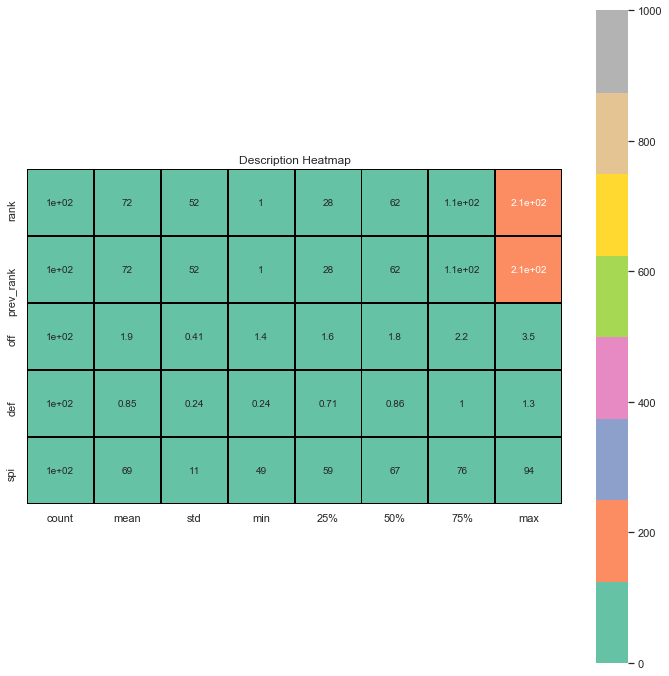

In [7]:
# Looking at the club data description
plt.figure(figsize=(12,12))
ax = sns.heatmap(club_data.describe().transpose(),
           annot=True, linecolor="black",
            linewidth=1, square=True, vmin=0, vmax=1000, 
                 cmap=sns.color_palette("Set2"))
plt.title("Description Heatmap")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

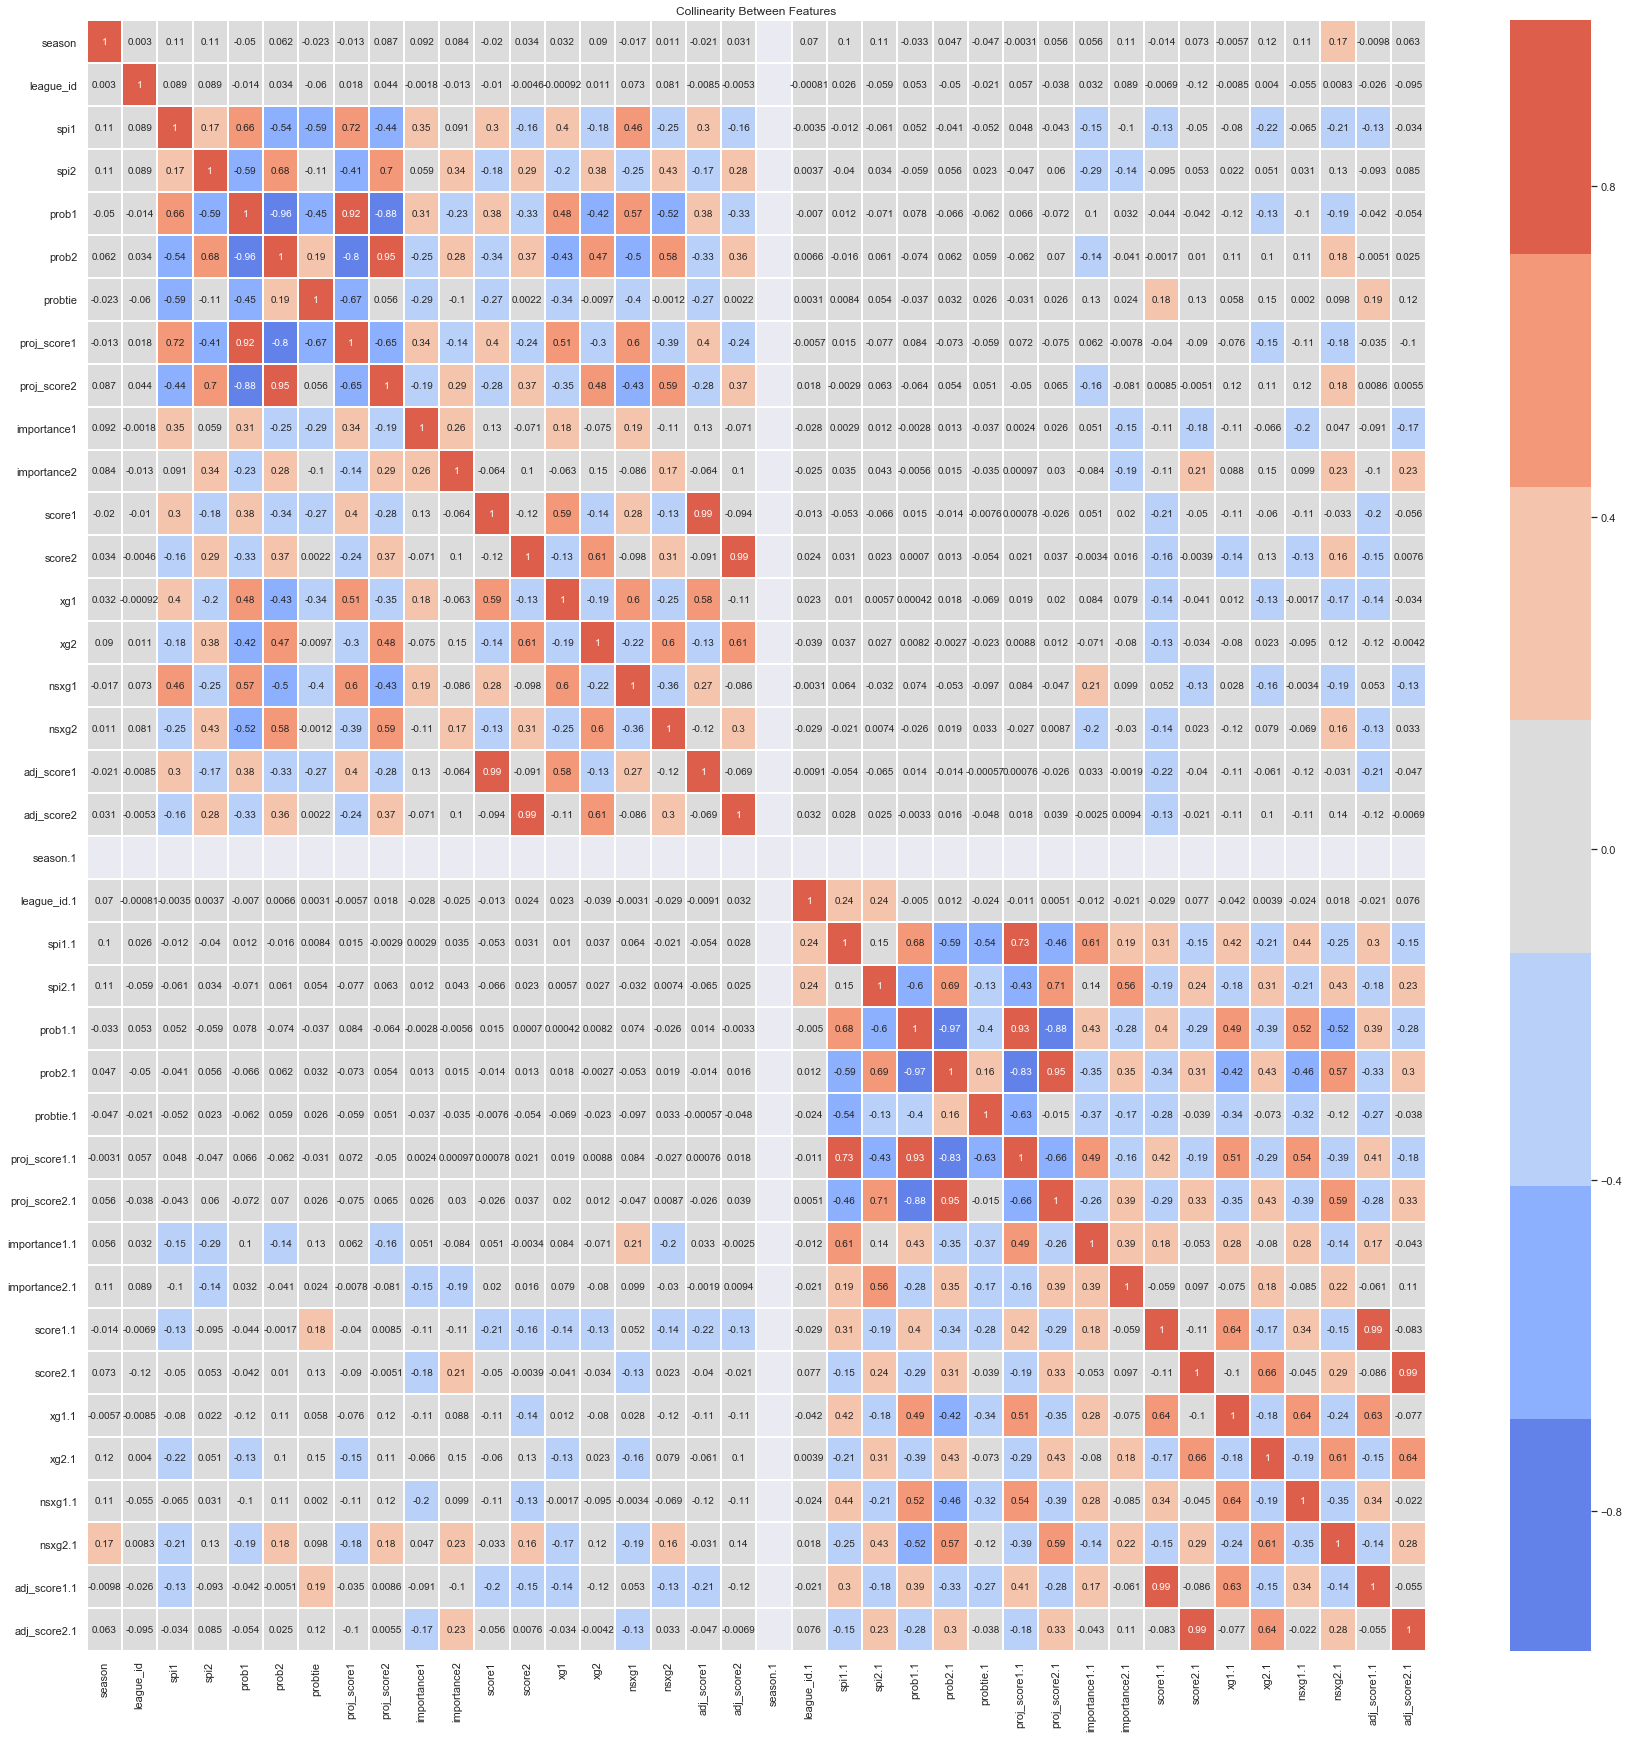

In [8]:
# Next I'll look at possible multicollinearity among the features
correlation = match_data.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

There are some redundant columns, and others that don't bring much meaningful information for modeling. I'll continue to pare down this dataset to a manageable level and reduce the number of features.  I want to reduce the number of features for selection in the final deployment so I will be removing all redundant columns, relative importances, NSXG, and all date/time related info.  

In [9]:
match_data_final = match_data[["league_id", "league", "team1", "team2", "spi1", "spi2",
                               "prob1", "prob2", "probtie", "proj_score1", "proj_score2", 
                               "score1", "score2", "xg1", "xg2"]].copy()
match_data_final.head(10)

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2
0,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,2.36,0.0,1.0,0.97,0.63
1,1843.0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,0.86,2.0,2.0,2.45,0.77
2,2411.0,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,1.24,2.0,1.0,0.85,2.77
3,2411.0,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,1.14,0.0,1.0,1.11,0.68
4,2411.0,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,1.38,1.0,1.0,0.73,1.11
5,2411.0,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,1.37,1.05,0.0,1.0,1.24,1.84
6,2411.0,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,1.30,1.01,1.0,1.0,1.40,0.55
7,2411.0,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,1.91,1.05,1.0,1.0,1.05,0.22
8,1843.0,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,1.39,1.14,3.0,2.0,1.03,1.84
9,2411.0,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,2.69,0.48,2.0,1.0,2.14,1.25


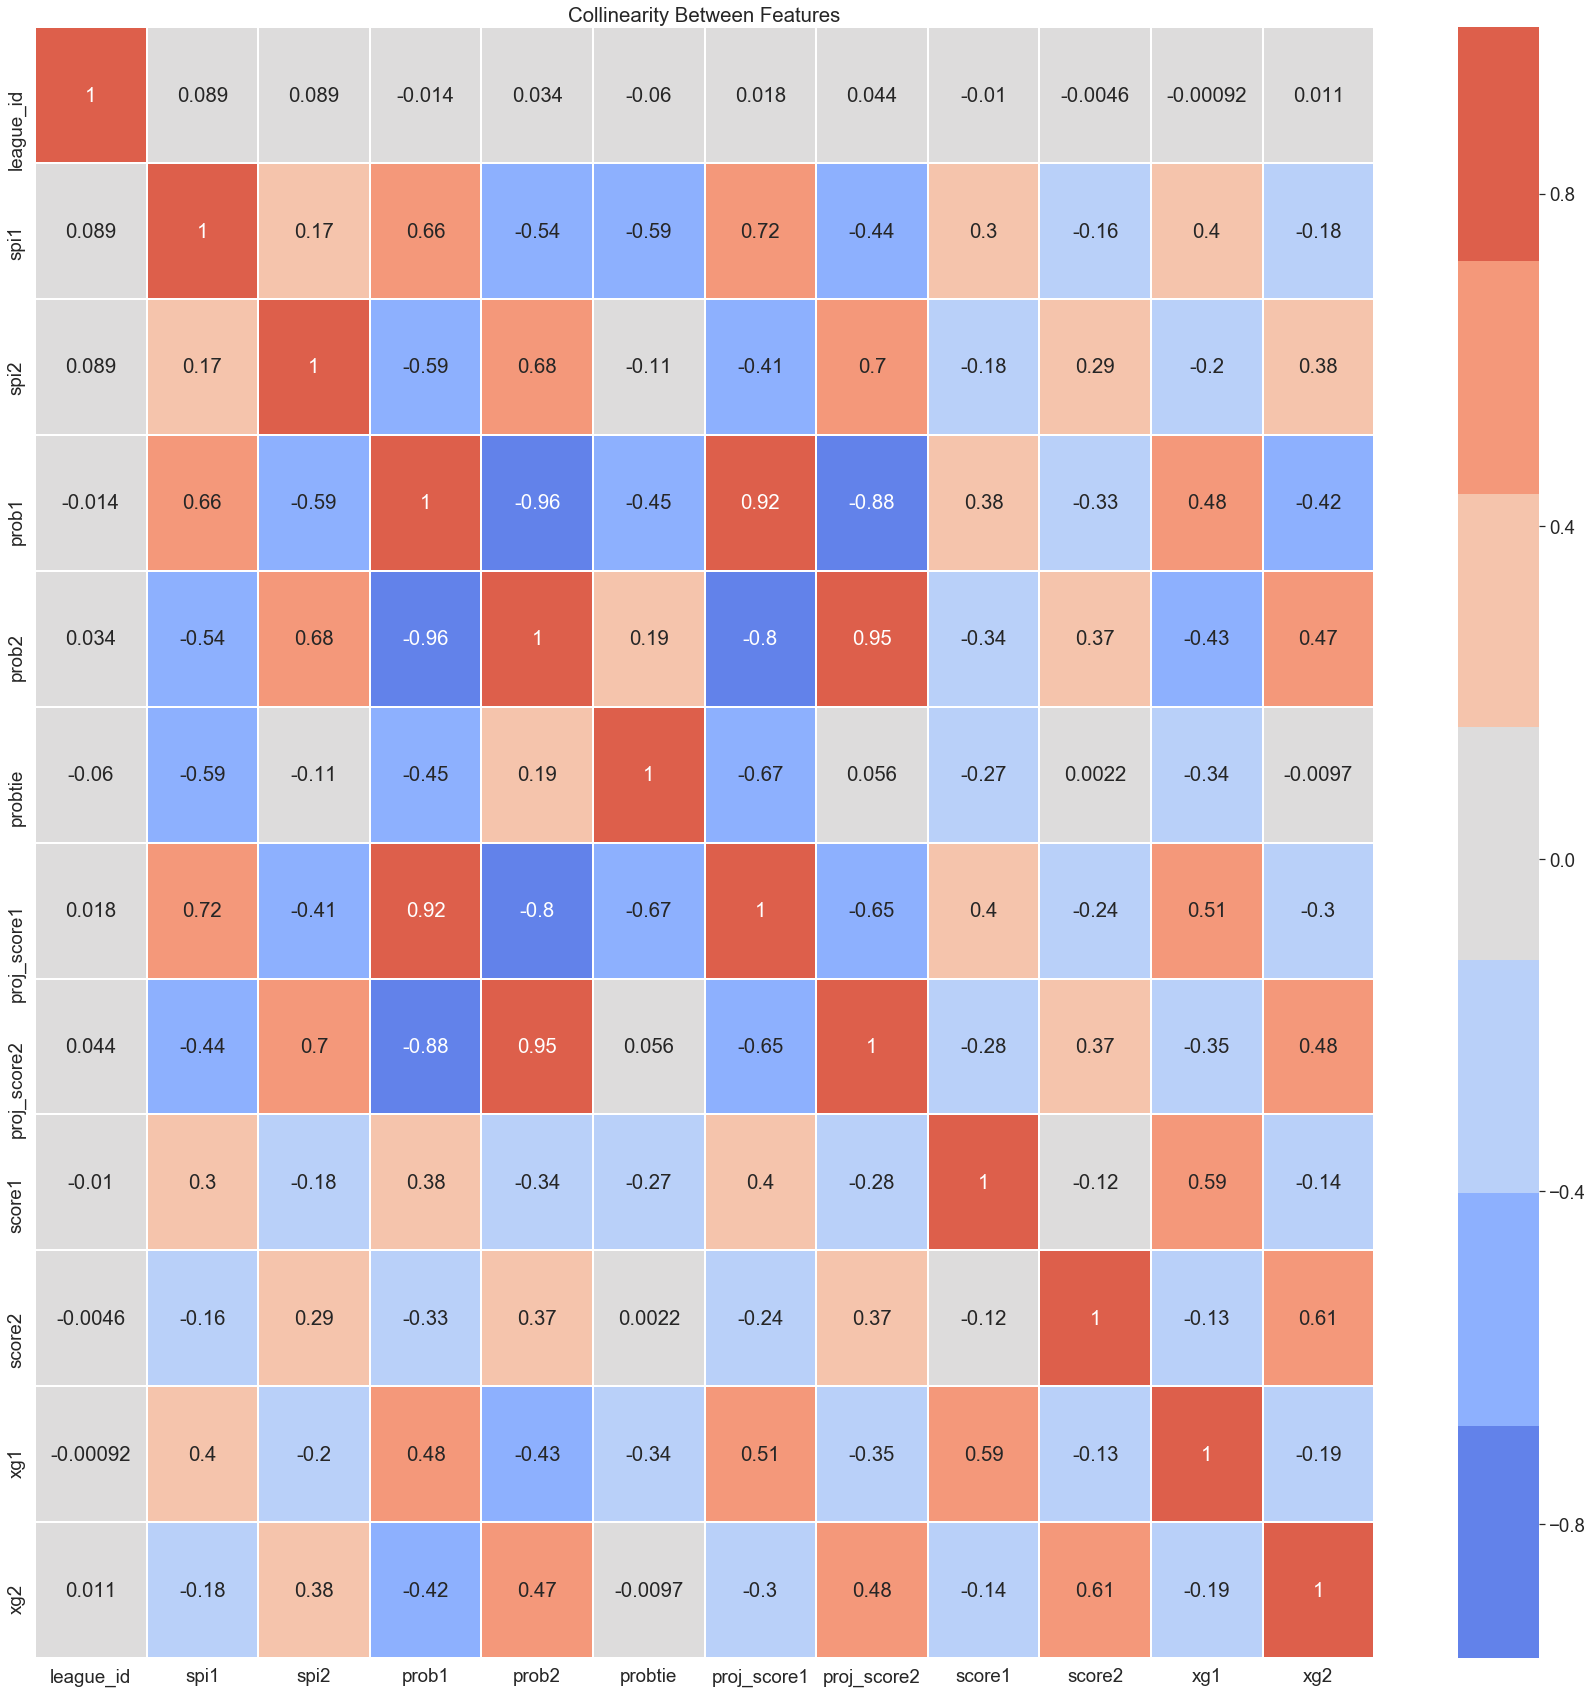

In [10]:
# another look at collinearity 
sns.set(font_scale=1.7)
correlation = match_data_final.corr()
plt.figure(figsize=(30,30))
ax = sns.heatmap(correlation, annot=True, 
                cmap=sns.color_palette("coolwarm", 7),
                linewidth=1, linecolor="white")
plt.title("Collinearity Between Features")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Due to the close correlation between prob1, prob2 and their respective projected score, I'm going to drop the proj_score1 and proj_score2 columns.  

In [11]:
match_data_final = match_data_final.drop(columns=["proj_score1", "proj_score2"])
match_data_final.head(10)

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,score1,score2,xg1,xg2
0,1843.0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.0,1.0,0.97,0.63
1,1843.0,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,2.0,2.0,2.45,0.77
2,2411.0,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,2.0,1.0,0.85,2.77
3,2411.0,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,0.0,1.0,1.11,0.68
4,2411.0,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.0,1.0,0.73,1.11
5,2411.0,Barclays Premier League,Burnley,Swansea City,58.98,59.74,0.4482,0.2663,0.2854,0.0,1.0,1.24,1.84
6,2411.0,Barclays Premier League,Middlesbrough,Stoke City,56.32,60.35,0.4380,0.2692,0.2927,1.0,1.0,1.40,0.55
7,2411.0,Barclays Premier League,Southampton,Watford,69.49,59.33,0.5759,0.1874,0.2367,1.0,1.0,1.05,0.22
8,1843.0,French Ligue 1,Bordeaux,St Etienne,62.01,64.92,0.4232,0.2764,0.3004,3.0,2.0,1.03,1.84
9,2411.0,Barclays Premier League,Manchester City,Sunderland,86.42,53.64,0.8152,0.0525,0.1323,2.0,1.0,2.14,1.25


In [13]:
match_data_final = match_data_final.drop(columns="league_id")
match_data_final

,league,team1,team2,spi1,spi2,prob1,prob2,probtie,score1,score2,xg1,xg2
0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.0,1.0,0.97,0.63
1,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,2.0,2.0,2.45,0.77
2,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,2.0,1.0,0.85,2.77
3,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,0.0,1.0,1.11,0.68
4,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.0,1.0,0.73,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...
11196,Italy Serie A,Internazionale,Udinese,84.87,63.23,0.6914,0.1134,0.1952,NaN,NaN,NaN,NaN
11197,Italy Serie A,Sampdoria,Parma,61.63,55.90,0.4757,0.2683,0.2560,NaN,NaN,NaN,NaN
11198,Italy Serie A,Crotone,Fiorentina,52.51,66.84,0.2702,0.4578,0.2721,NaN,NaN,NaN,NaN
11199,Italy Serie A,Cagliari,Genoa,57.00,54.17,0.4488,0.2821,0.2690,NaN,NaN,NaN,NaN


In [14]:
# Removing all rows where the score and xg data is absent
fullscore_data = match_data_final[match_data_final['score1'].notna()]
fullscore_data

,league,team1,team2,spi1,spi2,prob1,prob2,probtie,score1,score2,xg1,xg2
0,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.0,1.0,0.97,0.63
1,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,2.0,2.0,2.45,0.77
2,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,2.0,1.0,0.85,2.77
3,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,0.0,1.0,1.11,0.68
4,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.0,1.0,0.73,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...
9721,Spanish Primera Division,Levante,Alavés,67.68,63.78,0.4806,0.2466,0.2729,1.0,1.0,1.86,1.04
9722,Barclays Premier League,Arsenal,Aston Villa,81.07,71.42,0.5630,0.2040,0.2330,0.0,3.0,1.70,1.70
9723,Italy Serie A,AC Milan,Verona,79.96,59.55,0.6973,0.1073,0.1954,2.0,2.0,4.13,1.76
9724,French Ligue 1,Lyon,St Etienne,76.57,53.28,0.7121,0.0925,0.1955,2.0,1.0,2.93,1.54
